### Imported the libraries.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])  # House Prices Dataset

In [3]:
# TA: Typical/Average
# Gd: Good
# Ex: Excellent
# Po: Poor
# Fa: Fair

df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


### %age of Missing Values

In [41]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

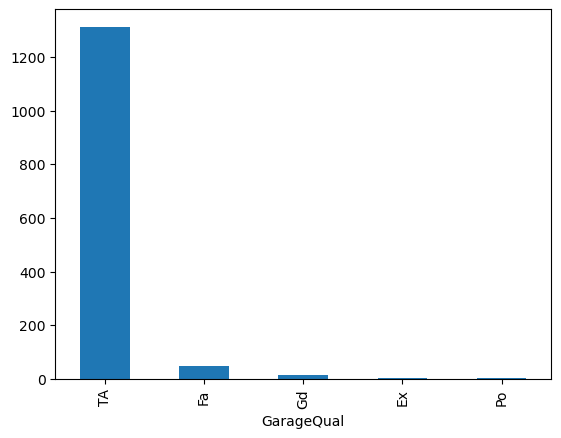

In [5]:
df['GarageQual'].value_counts().plot(kind='bar')  # Most Frequent Category is TA

In [42]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

### KDE plots for SlaePrice when Category is TA and Missing

Text(0.5, 1.0, 'GarageQual')

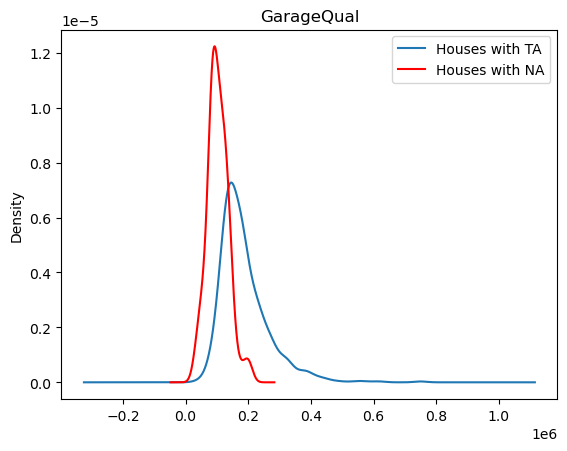

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

#### Saved Original SalePrice column where Category is TA so that we can compare Original and After Imputation SalePrice for Category = TA

In [8]:
temp = df[df['GarageQual']=='TA']['SalePrice']

### Imputed Missing Values with MODE

In [10]:
df['GarageQual'].fillna('TA', inplace=True)

<Axes: xlabel='GarageQual'>

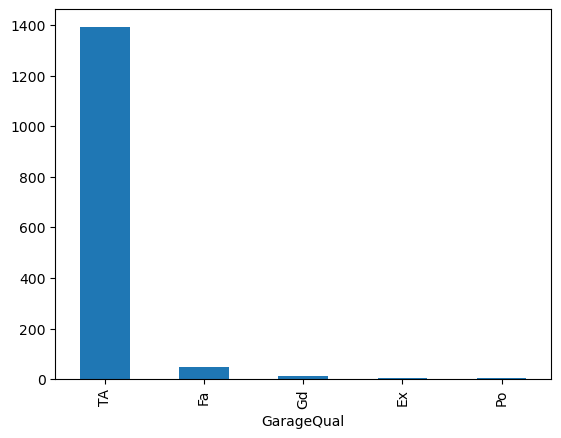

In [11]:
df['GarageQual'].value_counts().plot(kind='bar')

### KDE plots Before and After Imputation 

Text(0.5, 1.0, 'GarageQual')

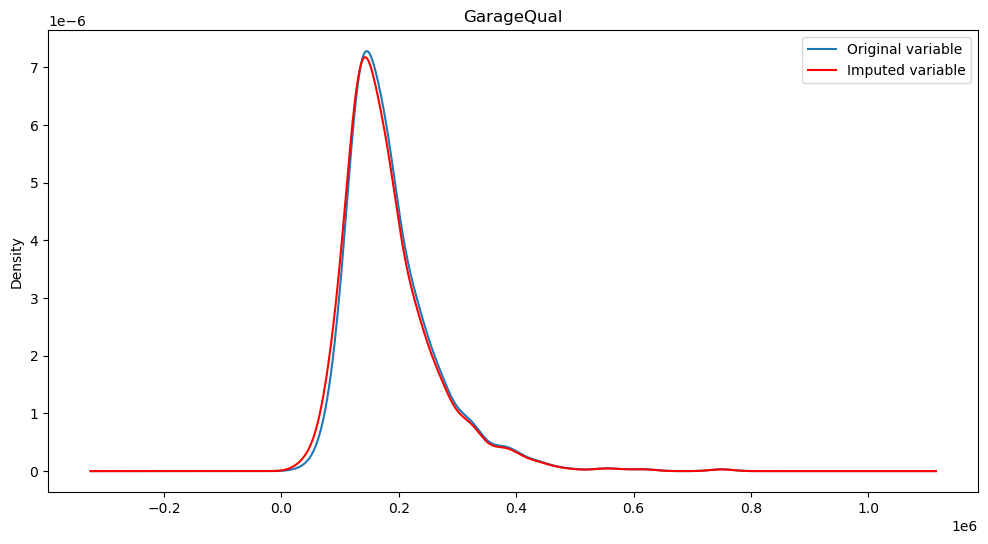

In [13]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

## All the above steps for FireplaceQu

<Axes: xlabel='FireplaceQu'>

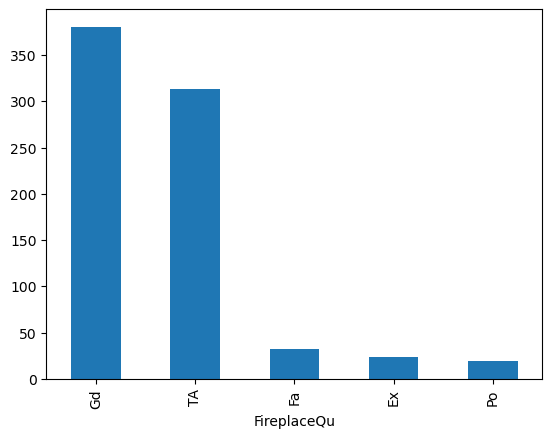

In [15]:
df['FireplaceQu'].value_counts().plot(kind='bar')  # Ideally Mode should be much greater in number than Other Categories. 

In [43]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

### KDE plots for SlaePrice when Category is TA and Missing

Text(0.5, 1.0, 'FireplaceQu')

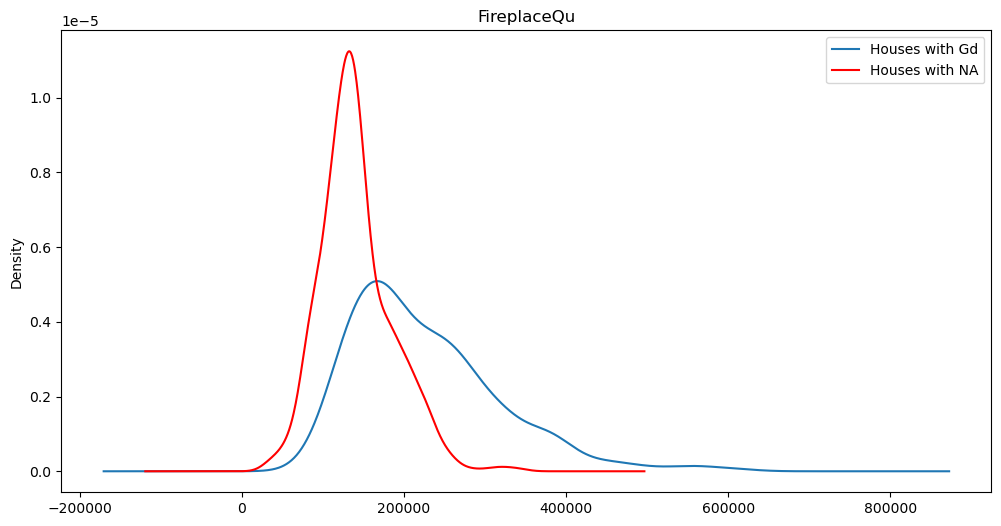

In [18]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

### Saved the Original SalePrice column where FireplaceQu = Good

In [19]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

### Imputed the Missing Values with Gd

In [20]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<Axes: xlabel='FireplaceQu'>

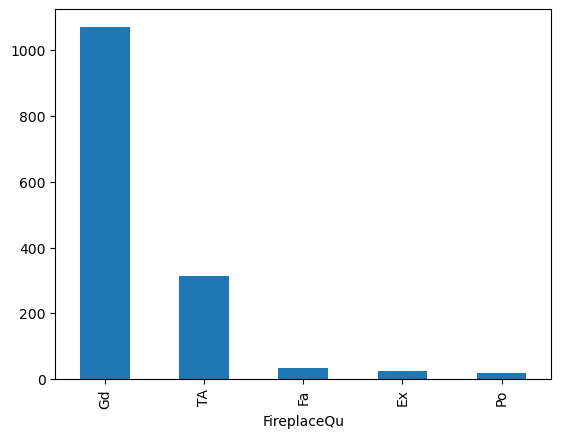

In [23]:
df['FireplaceQu'].value_counts().plot(kind='bar') # As Missing Values were around 50%, So Gd Category became grater in no.

### KDE plots Before and After Imputation.
#### After analyzing these plots, we conclude this technique is not recommended for FireplaceQu.

Text(0.5, 1.0, 'FireplaceQu')

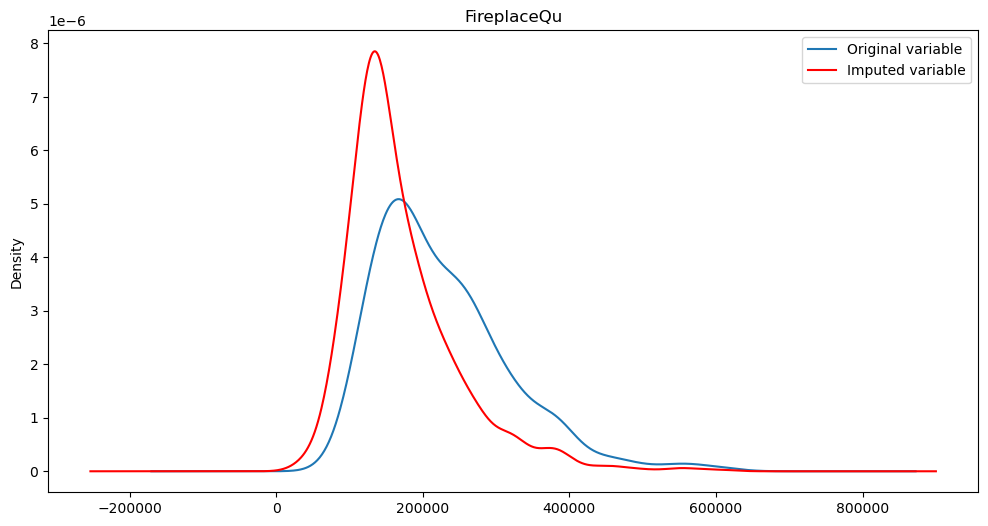

In [24]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

## Mode Imputation using sklearn.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [33]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [34]:
X_train.head()

,FireplaceQu,GarageQual
519,Gd,TA
815,Gd,TA
1064,Po,TA
1025,Gd,TA
1081,Gd,TA


In [35]:
imputer = SimpleImputer(strategy='most_frequent') # Defined SimpleImputer Object/Instance with strategy='most_frequent'

In [36]:
# fit_transform(X_train) is a method of the imputer object that fits the imputer to the training data (X_train)
# and applies the imputation transformation to fill in any missing values in X_train. 
# This means that missing values in X_train are replaced with the imputed values, 
# and the transformed dataset is assigned back to X_train.

In [37]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # NOTE:- Transformed X_test using X_train Mode only.

In [38]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

#### Now the missing values are imputed and can be used for further processing or Model Training.